In [ ]:
!pip install tensorflow==2.1.0
!pip install keras==2.4.3

In [ ]:
!pip install openpyxl==3.0.0

     |████████████████████████████████| 172 kB 26.9 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=bb2d65dc8ff15e10917fdcd4320fb1f31ddfcc94f2b9a21f134163add52b24c1
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install keras-tuner

In [ ]:
from kerastuner.tuners import RandomSearch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from kerastuner.tuners import RandomSearch

ModuleNotFoundError: ignored

In [ ]:
df = pd.read_excel(r'/content/drive/MyDrive/Solar Forecasting/AVE MISSING VALUES-INV 2 (put in ExtSolIrr).xlsx',sheet_name = 1)
df.head(10)

,$Date,MVSG_MAIN_REALPOWER,Time,MVSG_MAIN_REACTIVEPOWER,MVSG_MAIN_APPARENTPOWER,MVSG_MAIN_PF,MVSG_MAIN_FREQUENCY,MVSG_MAIN_THD_VOLTAGE,MVSG_MAIN_THD_CURRENT,MVSG_MAIN_VOLTAGE_AB,MVSG_MAIN_VOLTAGE_BC,MVSG_MAIN_VOLTAGE_CA,MVSG_MAIN_CURRENT_A,MVSG_MAIN_CURRENT_B,ExlSolIrr,TmpMdul C,WindVel km/h,Unnamed: 17
0,2020/01/01 00:00:00,19.14276,0,-31.09260,41.94751,0.456350,60.05,2.73,0.00,13099.23,13807.81,13508.60,1.345018,1.197238,0.00,21.67,0.00,False
1,2020/01/01 01:00:00,17.89139,1,-30.96842,41.02101,0.436152,59.93,2.31,0.00,13079.85,13821.63,13522.64,1.299363,1.052566,0.00,23.05,0.24,False
2,2020/01/01 02:00:00,17.78230,2,-31.73443,41.53598,0.428118,60.07,1.97,0.00,13193.64,13947.27,13630.14,1.321451,1.061144,0.00,24.66,0.00,False
3,2020/01/01 03:00:00,19.18466,3,-31.98866,41.86771,0.458221,60.10,1.82,0.00,13289.31,14025.97,13729.85,1.296783,1.090999,0.00,23.90,0.00,False
4,2020/01/01 04:00:00,18.27406,4,-32.20213,40.96452,0.446095,59.96,1.78,0.00,13320.74,14027.73,13738.38,1.293617,1.067519,0.00,24.26,0.53,False
5,2020/01/01 05:00:00,18.71329,5,-32.18654,40.70659,0.459712,60.00,1.76,0.00,13442.74,14118.93,13830.11,1.278305,1.084276,0.00,23.93,0.00,False
6,2020/01/01 06:00:00,16.37300,6,-31.54724,40.38739,0.405399,59.83,1.81,0.00,13462.44,14101.14,13830.35,1.362932,1.143694,0.00,22.88,0.41,False
7,2020/01/01 07:00:00,-396.53590,7,92.35720,415.57480,-0.954187,60.13,1.65,18.56,13407.25,13987.48,13720.61,18.051410,17.064100,39.71,25.47,0.07,True
8,2020/01/01 08:00:00,-2777.79600,8,827.59290,2899.96700,-0.957871,60.27,2.19,2.39,13408.59,13870.38,13656.31,124.174200,122.931600,112.63,31.75,0.00,True
9,2020/01/01 09:00:00,-2115.63500,9,615.05830,2204.91300,-0.959509,60.15,2.07,3.15,13288.40,13777.66,13533.79,94.677510,93.929110,268.79,33.57,2.69,True


In [ ]:
 df.describe()

,MVSG_MAIN_REALPOWER,Time,MVSG_MAIN_REACTIVEPOWER,MVSG_MAIN_APPARENTPOWER,MVSG_MAIN_PF,MVSG_MAIN_FREQUENCY,MVSG_MAIN_THD_VOLTAGE,MVSG_MAIN_THD_CURRENT,MVSG_MAIN_VOLTAGE_AB,MVSG_MAIN_VOLTAGE_BC,MVSG_MAIN_VOLTAGE_CA,MVSG_MAIN_CURRENT_A,MVSG_MAIN_CURRENT_B,ExlSolIrr,TmpMdul C,WindVel km/h
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-1600.875167,11.500000,516.844304,1769.969699,-0.326677,60.028006,1.916474,2.235729,13380.702237,13949.318671,13742.619092,76.315571,73.727991,214.214161,31.283514,1.252149
std,2331.812773,6.922582,817.202004,2412.936781,0.575666,0.108399,0.348545,4.515181,183.756379,159.968195,202.317956,104.338077,101.927027,310.762543,9.857169,2.346242
min,-8411.323000,0.000000,-35.812310,0.000000,-0.963529,59.470000,1.260000,0.000000,12462.590000,13296.160000,12522.900000,0.000000,0.000000,0.000000,15.330000,0.000000
25%,-3010.847000,5.750000,-31.793975,134.830400,-0.949184,59.950000,1.640000,0.000000,13273.670000,13849.880000,13650.942500,4.372877,5.349515,0.000000,24.530000,0.000000
50%,15.869665,11.500000,-29.852675,186.832650,0.111941,60.030000,1.900000,0.000000,13394.075000,13961.255000,13766.580000,6.599284,7.476679,0.010000,26.940000,0.000000
75%,20.161079,17.250000,925.093950,3150.993250,0.146885,60.100000,2.090000,2.202500,13501.275000,14053.667500,13867.217500,137.200200,130.627475,384.882500,35.875000,1.522500
max,28.967050,23.000000,3153.151000,8985.024000,1.000000,60.430000,3.450000,52.870000,14048.870000,14632.360000,14450.600000,388.615000,384.519100,1176.890000,65.490000,20.700000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   $Date                    8760 non-null   object 
 1   MVSG_MAIN_REALPOWER      8760 non-null   float64
 2   Time                     8760 non-null   int64  
 3   MVSG_MAIN_REACTIVEPOWER  8760 non-null   float64
 4   MVSG_MAIN_APPARENTPOWER  8760 non-null   float64
 5   MVSG_MAIN_PF             8760 non-null   float64
 6   MVSG_MAIN_FREQUENCY      8760 non-null   float64
 7   MVSG_MAIN_THD_VOLTAGE    8760 non-null   float64
 8   MVSG_MAIN_THD_CURRENT    8760 non-null   float64
 9   MVSG_MAIN_VOLTAGE_AB     8760 non-null   float64
 10  MVSG_MAIN_VOLTAGE_BC     8760 non-null   float64
 11  MVSG_MAIN_VOLTAGE_CA     8760 non-null   float64
 12  MVSG_MAIN_CURRENT_A      8760 non-null   float64
 13  MVSG_MAIN_CURRENT_B      8760 non-null   float64
 14  ExlSolIrr               

In [ ]:
df['$Date'] = pd.to_datetime(df['$Date'], infer_datetime_format = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe455c43d90>,
      dtype=object)

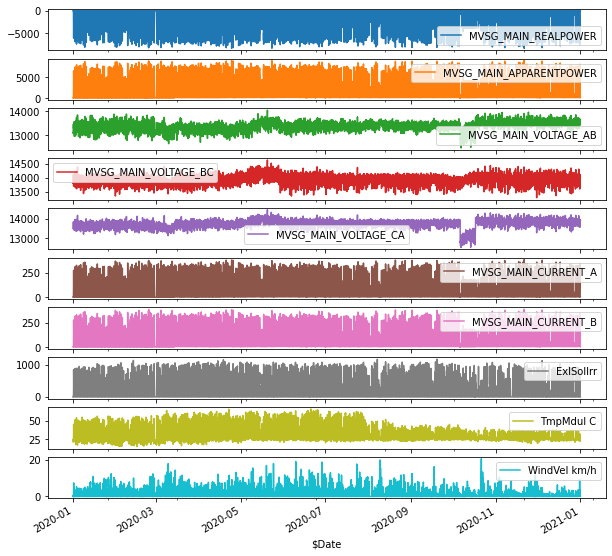

In [ ]:
df.set_index('$Date')[['MVSG_MAIN_REALPOWER' , 'MVSG_MAIN_APPARENTPOWER', 'MVSG_MAIN_VOLTAGE_AB', 'MVSG_MAIN_VOLTAGE_BC', 'MVSG_MAIN_VOLTAGE_CA', 'MVSG_MAIN_CURRENT_A', 'MVSG_MAIN_CURRENT_B', 'ExlSolIrr', 'TmpMdul C', 'WindVel km/h']].plot(subplots = True, figsize = (10,10))

In [ ]:

df.head()

,$Date,MVSG_MAIN_REALPOWER,Time,MVSG_MAIN_REACTIVEPOWER,MVSG_MAIN_APPARENTPOWER,MVSG_MAIN_PF,MVSG_MAIN_FREQUENCY,MVSG_MAIN_THD_VOLTAGE,MVSG_MAIN_THD_CURRENT,MVSG_MAIN_VOLTAGE_AB,MVSG_MAIN_VOLTAGE_BC,MVSG_MAIN_VOLTAGE_CA,MVSG_MAIN_CURRENT_A,MVSG_MAIN_CURRENT_B,ExlSolIrr,TmpMdul C,WindVel km/h,Unnamed: 17
0,2020-01-01 00:00:00,19.14276,0,-31.09260,41.94751,0.456350,60.05,2.73,0.0,13099.23,13807.81,13508.60,1.345018,1.197238,0.0,21.67,0.00,False
1,2020-01-01 01:00:00,17.89139,1,-30.96842,41.02101,0.436152,59.93,2.31,0.0,13079.85,13821.63,13522.64,1.299363,1.052566,0.0,23.05,0.24,False
2,2020-01-01 02:00:00,17.78230,2,-31.73443,41.53598,0.428118,60.07,1.97,0.0,13193.64,13947.27,13630.14,1.321451,1.061144,0.0,24.66,0.00,False
3,2020-01-01 03:00:00,19.18466,3,-31.98866,41.86771,0.458221,60.10,1.82,0.0,13289.31,14025.97,13729.85,1.296783,1.090999,0.0,23.90,0.00,False
4,2020-01-01 04:00:00,18.27406,4,-32.20213,40.96452,0.446095,59.96,1.78,0.0,13320.74,14027.73,13738.38,1.293617,1.067519,0.0,24.26,0.53,False


In [ ]:
df_input = df[['MVSG_MAIN_REALPOWER', 'Time','MVSG_MAIN_APPARENTPOWER', 'MVSG_MAIN_PF','MVSG_MAIN_VOLTAGE_AB','MVSG_MAIN_VOLTAGE_BC', 'MVSG_MAIN_VOLTAGE_CA','MVSG_MAIN_CURRENT_A','MVSG_MAIN_CURRENT_B']]
df.reset_index(drop=True, inplace=True)

df_input_power_abs = df[['MVSG_MAIN_REALPOWER']].abs()

df_input_power_abs.reset_index(drop=True, inplace=True)

df_input_pf_abs = df[['MVSG_MAIN_PF']].abs()

df_input_pf_abs.reset_index(drop=True, inplace=True)

df_input = pd.concat([df_input_power_abs, df[['Time']], df[['MVSG_MAIN_APPARENTPOWER']], df_input_pf_abs],axis=1)
df_input.head(20)

,MVSG_MAIN_REALPOWER,Time,MVSG_MAIN_APPARENTPOWER,MVSG_MAIN_PF
0,19.14276,0,41.94751,0.456350
1,17.89139,1,41.02101,0.436152
2,17.78230,2,41.53598,0.428118
3,19.18466,3,41.86771,0.458221
4,18.27406,4,40.96452,0.446095
5,18.71329,5,40.70659,0.459712
6,16.37300,6,40.38739,0.405399
7,396.53590,7,415.57480,0.954187
8,2777.79600,8,2899.96700,0.957871
9,2115.63500,9,2204.91300,0.959509


In [ ]:
df_input.describe()

,MVSG_MAIN_REALPOWER,Time,MVSG_MAIN_APPARENTPOWER,MVSG_MAIN_PF
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,1621.758856,11.500000,1769.969699,0.541333
std,2317.335245,6.922582,2412.936781,0.380849
min,0.000000,0.000000,0.000000,0.010147
25%,19.872933,5.750000,134.830400,0.141758
50%,22.843105,11.500000,186.832650,0.435130
75%,3010.847000,17.250000,3150.993250,0.949186
max,8411.323000,23.000000,8985.024000,1.000000


In [ ]:
MM = MinMaxScaler()

data_scaled = MM.fit_transform(df_input)
#Try splitting before scaling to avoid Data Leakage
features = data_scaled
target = data_scaled[:,0]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(features, target, test_size = 0.2, random_state = 0, shuffle = False)

In [ ]:
def build_model (hp):
  model = tf.keras.Sequential()
  for i in range(hp.Int('num_layers', 1, 4)):
    model.add(tf.keras.layers.LSTM(units = hp.Int('units_' + str(i), min_value =50,
                                          max_value = 200,
                                          step=50),
                           activation ='relu', return_sequences = True))
  model.add(tf.keras.layers.Dense(1, activation = 'linear'))
  model.compile(loss = 'mae',
              optimizer = 'adam',
              metrics = ['mse'])
  return model

In [ ]:
tuner = RandomSearch(build_model,
                     objective = 'val_loss',
                     max_trials =5,

                     directory = 'project2')
#try adding executions per trials

In [ ]:
tuner.search(train_generator, epochs = 100, validation_data = test_generator)

Trial 5 Complete [00h 00m 59s]
val_loss: 0.05559668689966202

Best val_loss So Far: 0.05559668689966202
Total elapsed time: 00h 04m 20s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 50, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 50, 'sampling': None}


In [ ]:
tuner.results_summary(num_trials=1)
#Hyperparameters:

#num_layers: 2
#units_0: 200
#units_1: 200
#Score: 0.05559668689966202

Results summary
Results in project2/untitled_project
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layers: 2
units_0: 200
units_1: 200
Score: 0.05559668689966202


In [ ]:
print(tuner.get_best_hyperparameters(num_trials=1)[0].values)
#{'num_layers': 2, 'units_0': 200, 'units_1': 200}

{'num_layers': 2, 'units_0': 200, 'units_1': 200}


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7008, 4)
(7008,)
(1752, 4)
(1752,)


In [ ]:
win_length = 1
num_features = 4
y_test = np.array(y_test)
train_generator = TimeseriesGenerator(X_train, y_train , length = win_length, sampling_rate=1,batch_size= 128)
test_generator = TimeseriesGenerator(X_test, y_test , length = win_length, sampling_rate=1,batch_size= 128)

In [ ]:
best_model = tuner.get_best_models()[0]
best_model.build(input_shape = (1,win_length,num_features))
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 1, 200)               164000    
_________________________________________________________________
lstm_1 (LSTM)                (1, 1, 200)               320800    
_________________________________________________________________
dense (Dense)                (1, 1, 1)                 201       
Total params: 485,001
Trainable params: 485,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1, 200)            164000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 485,001
Trainable params: 485,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 5,
                                                  mode = 'min')

model.compile(loss = 'mae',
              optimizer = 'adam',
              metrics = ['mse'])



In [ ]:
history = model.fit(x = train_generator, epochs = 100,
                              validation_data = test_generator,
                              shuffle = False,
                             callbacks = [early_stopping] )

Epoch 1/100
55/55 [==============================] - 3s 15ms/step - loss: 0.0620 - mse: 0.0158 - val_loss: 0.0594 - val_mse: 0.0144
Epoch 2/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0616 - mse: 0.0159 - val_loss: 0.0599 - val_mse: 0.0149
Epoch 3/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0616 - mse: 0.0159 - val_loss: 0.0597 - val_mse: 0.0148
Epoch 4/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0617 - mse: 0.0159 - val_loss: 0.0603 - val_mse: 0.0151
Epoch 5/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0616 - mse: 0.0158 - val_loss: 0.0600 - val_mse: 0.0145
Epoch 6/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0620 - mse: 0.0159 - val_loss: 0.0601 - val_mse: 0.0147


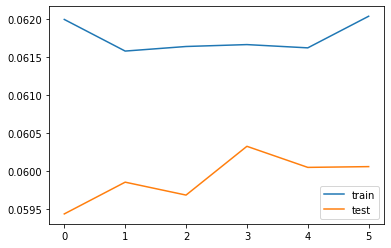

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_generator)

14/14 [==============================] - 0s 3ms/step - loss: 0.0601 - mse: 0.0147


[0.06005805730819702, 0.01474661286920309]

In [ ]:
predictions = model.predict(test_generator)

In [ ]:
predictions[0:24]

array([[0.00115603],
       [0.00200908],
       [0.00266747],
       [0.00319999],
       [0.00410751],
       [0.00753139],
       [0.01639587],
       [0.01463834],
       [0.26273972],
       [0.49442887],
       [0.19428363],
       [0.21593808],
       [0.18267258],
       [0.16159137],
       [0.08127282],
       [0.02176204],
       [0.00774616],
       [0.00496413],
       [0.00476661],
       [0.00429887],
       [0.00390933],
       [0.0035051 ],
       [0.00312042],
       [0.0027302 ]], dtype=float32)

In [ ]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(X_test[:,1:][win_length:])], axis =1)

In [ ]:
rev_trans = MM.inverse_transform(df_pred)

In [ ]:
df_final = df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

MVSG_MAIN_REALPOWER        1751
Time                       1751
MVSG_MAIN_APPARENTPOWER    1751
MVSG_MAIN_PF               1751
dtype: int64

In [ ]:
df_final['Power_Pred'] = rev_trans[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_final

,MVSG_MAIN_REALPOWER,Time,MVSG_MAIN_APPARENTPOWER,MVSG_MAIN_PF,Power_Pred
7009,20.23379,1,155.0393,0.130507,9.723749
7010,20.19539,2,145.6029,0.138702,16.899039
7011,20.46309,3,138.4844,0.148774,22.436916
7012,20.28119,4,133.3043,0.152142,26.916131
7013,20.07459,5,130.3223,0.154038,34.549568
...,...,...,...,...,...
8755,22.38502,19,148.9497,0.150286,41.124957
8756,22.30906,20,139.8804,0.159487,36.618620
8757,22.72556,21,132.9546,0.170927,33.313914
8758,21.69219,22,126.6613,0.171261,30.114569


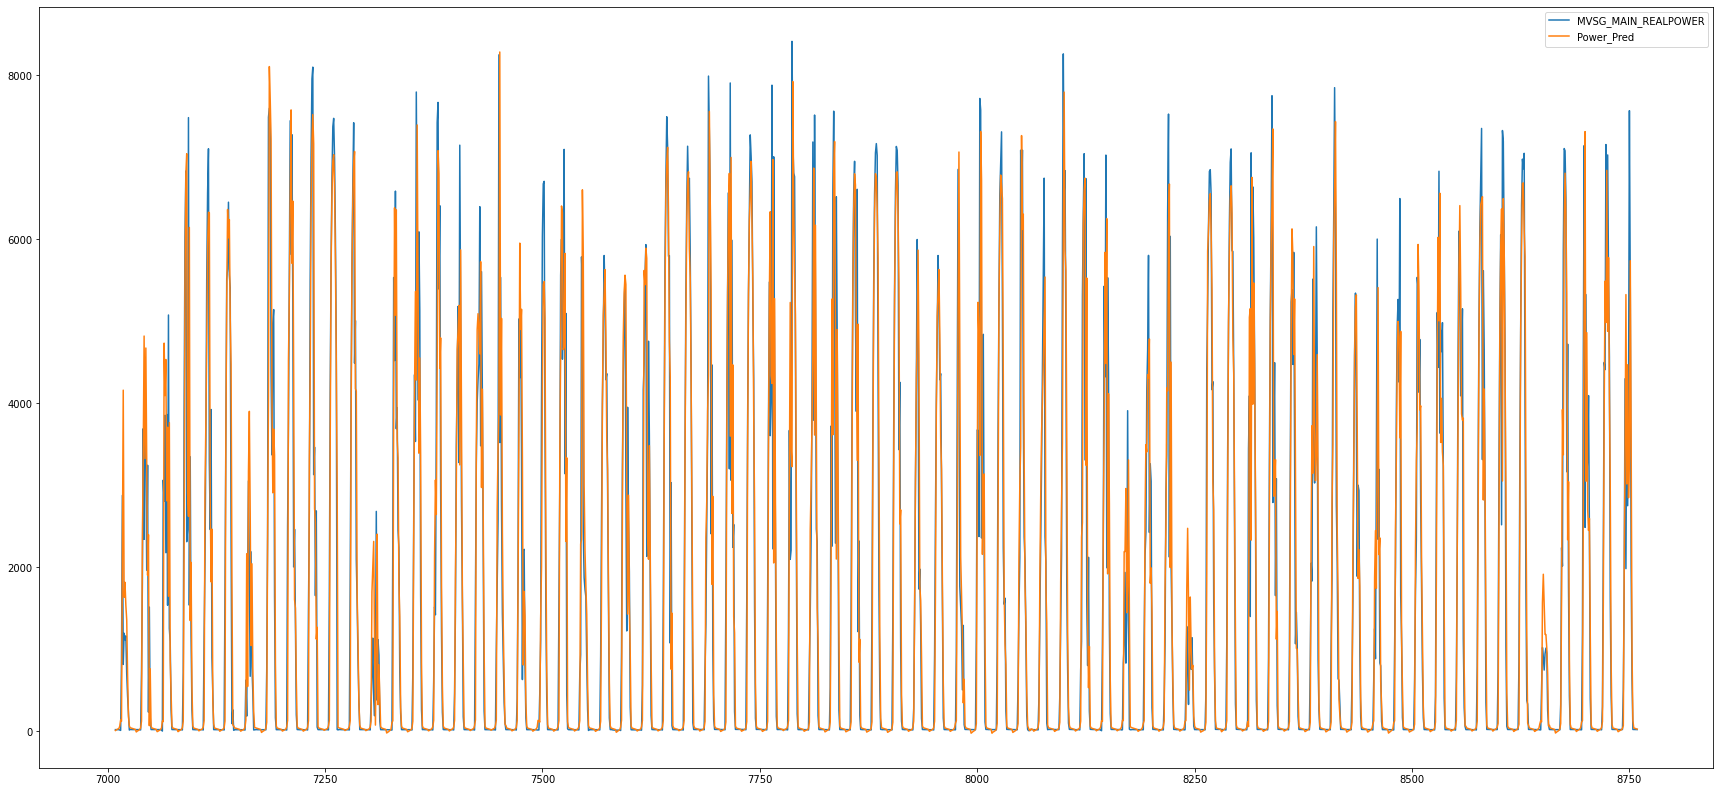

In [ ]:
df_final[['MVSG_MAIN_REALPOWER', 'Power_Pred']].plot(figsize=(30,14))

In [ ]:
from sklearn.metrics import r2_score
import math
print("The R2 score is: ", r2_score(df_final[['MVSG_MAIN_REALPOWER']], df_final[['Power_Pred']])*100)
print("The R score is: ", math.sqrt(r2_score(df_final[['MVSG_MAIN_REALPOWER']], df_final[['Power_Pred']]))*100)
#R score is the correlation between variables (predicted and actual)
#R2 score is the % of variance

The R2 score is:  79.13479604623069
The R score is:  88.95774055484475


In [ ]:

from tensorflow import keras

!mkdir -p saved_model
model.save('/content/drive/MyDrive/Solar Forecasting/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Solar Forecasting/my_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Solar Forecasting/my_model/assets


**FOR EXECUTION OF PREDICTIONS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from tensorflow import keras
import numpy as np
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/Solar Forecasting/my_model')

df = pd.read_excel(r'/content/drive/MyDrive/Solar Forecasting/AVE MISSING VALUES-INV 2 (put in ExtSolIrr).xlsx',sheet_name = 1)
df_input = df[['MVSG_MAIN_REALPOWER', 'Time','MVSG_MAIN_APPARENTPOWER', 'MVSG_MAIN_PF','MVSG_MAIN_VOLTAGE_AB','MVSG_MAIN_VOLTAGE_BC', 'MVSG_MAIN_VOLTAGE_CA','MVSG_MAIN_CURRENT_A','MVSG_MAIN_CURRENT_B']]
df.reset_index(drop=True, inplace=True)

df_input_power_abs = df[['MVSG_MAIN_REALPOWER']].abs()

df_input_power_abs.reset_index(drop=True, inplace=True)

df_input_pf_abs = df[['MVSG_MAIN_PF']].abs()

df_input_pf_abs.reset_index(drop=True, inplace=True)

df_input = pd.concat([df_input_power_abs, df[['Time']], df[['MVSG_MAIN_APPARENTPOWER']], df_input_pf_abs],axis=1)
df_input.head(20)

MM = MinMaxScaler()

data_scaled = MM.fit_transform(df_input)

In [ ]:
x_input = np.array([185.66, 17, 185.66, 1]).reshape(1, 4)
#x_input = np.array([tdi1]).reshape(72, 4)
tdi1 = MM.transform(x_input)
features1 = tdi1[:,0:]
target1 = tdi1[:,0:1]
tdi1 = tdi1.reshape((1,1,4))
#tdi1 = tdi1.reshape((1,72,4))
#tdi1
prediction1 = model.predict(tdi1)
MM1 = MinMaxScaler()
MM1.min_, MM1.scale_ = MM.min_[0], MM.scale_[0]
reverse1 = MM1.inverse_transform(prediction1)
reverse1

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 5s 5s/step


array([[151.36491]], dtype=float32)

**INTERPOLATION OF ACTUAL TO PREDICTED**

Bids for RASLAG 1

In [ ]:
values_for_bid_hour = np.linspace(2208.88,reverse1.ravel() , num= 6)
values_for_bid_hour.ravel()

array([2208.88   , 1797.377  , 1385.8739 ,  974.37085,  562.8679 ,
        151.36491], dtype=float32)

Bids for RASLAG 2

In [ ]:
values_for_bid_hour.ravel()*(2960.6/2208.88)

array([2960.5999, 2409.0554, 1857.5107, 1305.9661,  754.4216,  202.877 ],
      dtype=float32)

In [ ]:
np.linspace(0,1 , num= 12)

array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
       0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
       0.90909091, 1.        ])

Bids for RASLAG 3


In [ ]:
values_for_bid_hour = np.linspace(2208.88,reverse1.ravel() , num= 6)
values_for_bid_hour.ravel()

array([2208.88   , 1797.377  , 1385.8739 ,  974.37085,  562.8679 ,
        151.36491], dtype=float32)

In [ ]:
act_preds = pd.read_excel('/content/drive/MyDrive/Solar Forecasting/BIDS.xlsx', sheet_name=0)
act_preds

,DATE,Predictions,Power,Time,Apparent Power,PF
0,"July 31, 2021",0.0,0.0,1,0.0,0.0
1,NaN,0.0,0.0,2,0.0,0.0
2,NaN,0.0,0.0,3,0.0,0.0
3,NaN,0.0,0.0,4,0.0,0.0
4,NaN,0.0,0.0,5,0.0,0.0
...,...,...,...,...,...,...
225,NaN,0.0,0.0,19,0.0,0.0
226,NaN,0.0,0.0,20,0.0,0.0
227,NaN,0.0,0.0,21,0.0,0.0
228,NaN,0.0,0.0,22,0.0,0.0


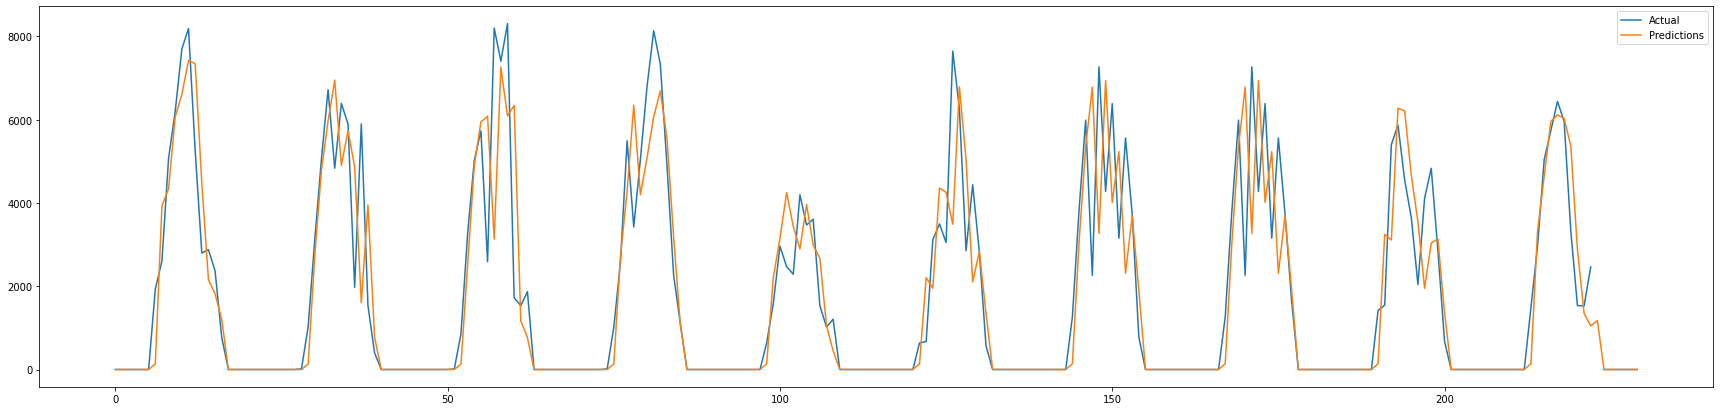

In [ ]:
fig, ax = plt.subplots(figsize = (30,7))
plt.plot( act_preds['Power'], label = 'Actual')
plt.plot( act_preds['Predictions'], label = 'Predictions')
plt.legend()